In [1]:
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
X_test.shape,y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [6]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [7]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
def plot_image(X,y,index):
    plt.figure(figsize=(3,3))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

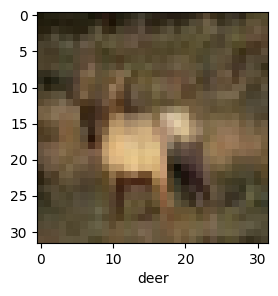

In [10]:
plot_image(X_train,y_train,3)

In [11]:
y_test=y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [12]:
X_train=X_train/255
X_test=X_test/255

In [13]:
model=keras.Sequential([
    
    #cnn
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=[("accuracy")])

In [14]:
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 16s 4ms/step - loss: 1.4619 - accuracy: 0.4744
Epoch 2/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1139 - accuracy: 0.6101
Epoch 3/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9797 - accuracy: 0.6592
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8955 - accuracy: 0.6886
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8184 - accuracy: 0.7139
Epoch 6/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7660 - accuracy: 0.7339
Epoch 7/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7091 - accuracy: 0.7532
Epoch 8/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6610 - accuracy: 0.7695
Epoch 9/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6188 - accuracy: 0.7843
Epoch 10/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.57

In [15]:
y_pred=model.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]

313/313 [==============================] - 1s 2ms/step


In [16]:
from sklearn.metrics import confusion_matrix,precision_score,f1_score,recall_score,classification_report
print(f"Classification Report:\n",classification_report(y_test,y_pred_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.68      0.71      1000
           1       0.80      0.74      0.77      1000
           2       0.54      0.55      0.54      1000
           3       0.46      0.42      0.44      1000
           4       0.65      0.59      0.62      1000
           5       0.44      0.72      0.55      1000
           6       0.77      0.69      0.73      1000
           7       0.73      0.69      0.71      1000
           8       0.81      0.75      0.78      1000
           9       0.75      0.72      0.74      1000

    accuracy                           0.65     10000
   macro avg       0.67      0.65      0.66     10000
weighted avg       0.67      0.65      0.66     10000



In [17]:
y_pred_classes[:5]

[3, 8, 5, 0, 4]

In [18]:
classes[y_test[5]]

'frog'

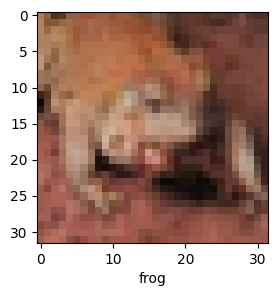

In [19]:
plot_image(X_test,y_pred_classes,5)

In [20]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

In [21]:
y_pred_classes[:10]

[3, 8, 5, 0, 4, 6, 5, 6, 3, 1]